In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Research Project Mango/Himeth - Mango Leaf Diseases'

/content/drive/MyDrive/Research Project Mango/Himeth - Mango Leaf Diseases


In [4]:
train_path = '/content/drive/MyDrive/Research Project Mango/Himeth - Mango Leaf Diseases'
val_path = '/content/drive/MyDrive/Research Project Mango/Himeth - Mango Leaf Diseases'

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
val_datagen = ImageDataGenerator(rescale=1.0/255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


In [8]:
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 6 classes.


In [9]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Anthracnose', 'Bacterial Canker', 'Die Back', 'Gall Midge',
       'Healthy', 'Sooty Mould'], dtype='<U16')

In [10]:
for image_batch, label_batch in train_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)


In [11]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
base_model.trainable = False

In [13]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,360,838 (12.82 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [16]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 779s 8s/step - accuracy: 0.7848 - loss: 0.6460 - val_accuracy: 0.9890 - val_loss: 0.0446
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.9858 - loss: 0.0501 - val_accuracy: 0.9953 - val_loss: 0.0217
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step - accuracy: 0.9934 - loss: 0.0312 - val_accuracy: 0.9947 - val_loss: 0.0189
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 378s 3s/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9990 - val_loss: 0.0091
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 431s 4s/step - accuracy: 0.9911 - loss: 0.0205 - val_accuracy: 0.9963 - val_loss: 0.0116
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.9957 - loss: 0.0155 - val_accuracy: 0.9993 - val_loss: 0.0047
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9978 - loss: 0.0101 - val_accuracy: 0.9983 - val_loss: 0.0070
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.9947 - loss: 0.0158 - val_accuracy: 0.9993 - val_loss: 0.

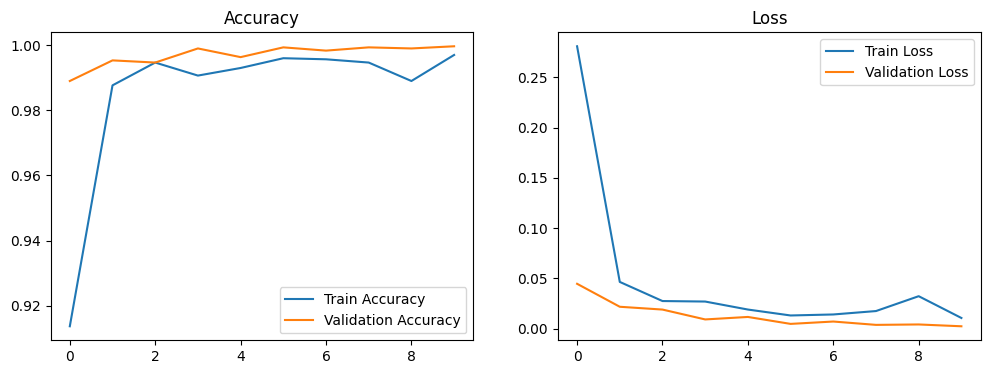

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [18]:
from tensorflow.keras.models import load_model

model.save('sample_model.h5')

In [20]:
arr = model.predict(image_batch)
predicted_id = np.argmax(arr, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
true_label_batch = class_names[label_id]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


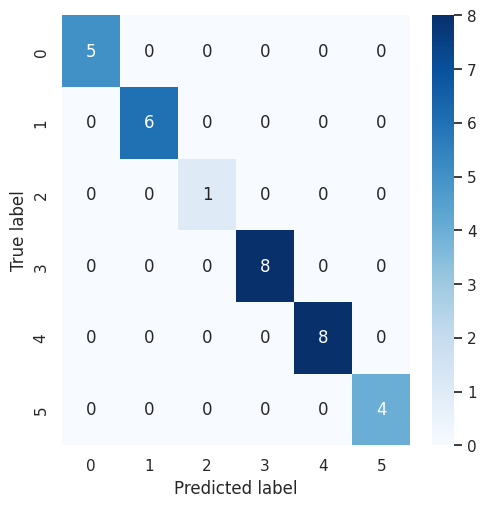

In [21]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

con_mat_df=tf.math.confusion_matrix(
    labels = label_id , predictions = predicted_id
)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(label_id, predicted_id, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         4

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow_hub as hub

In [24]:
model= tf.keras.models.load_model(
       ('sample_model.h5'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [25]:
img=image.load_img('/content/drive/MyDrive/Research Project Mango/Himeth - Mango Leaf Diseases/Die Back/20211129_160428 (Custom).jpg',target_size=(224, 224))

In [26]:
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [27]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Die Back


In [28]:
classes=class_names

In [29]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    prob = prediction

    index = np.argmax(prediction)
    confidence = prob[0][index]

    if confidence >= 0.3:
        plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='orange')
        plt.imshow(img_array)
    else:
        plt.title("Not Detected", size=18, color='red')
        plt.imshow(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


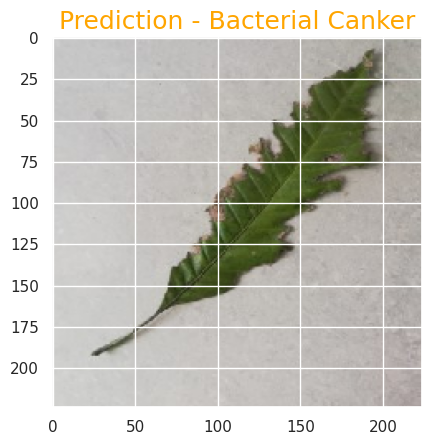

In [30]:
predict_image('/content/drive/MyDrive/Research Project Mango/Himeth - Mango Leaf Diseases/Bacterial Canker/IMG_20211106_120811 (Custom).jpg', model)

Saving IMG_20211106_120811 (Custom).jpg to IMG_20211106_120811 (Custom) (1).jpg
File uploaded: IMG_20211106_120811 (Custom) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


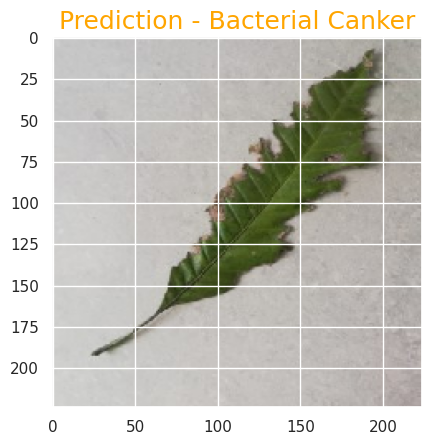

In [32]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'File uploaded: {filename}')
    predict_image(filename, model)